# Clustering Assignment

## 1. Read and visualise the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
country = pd.read_csv("Country.csv", sep=",", encoding="ISO-8859-1", header=0)
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# read the dictionary dataset
dicn = pd.read_csv("data-dictionary.csv", sep=",", encoding="ISO-8859-1", header=0)

In [4]:
dicn.head(30)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [5]:
# basics of the df
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## 2. Clean the data

In [6]:
# missing values
round(100*(country.isnull().sum())/len(country), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

- there are no missing values in the dataset so we need not treat the missing values

In [8]:
#checking shape
country.shape

(167, 10)

## 3. Converting Features to their actual values

In [9]:
#as these values are % of their GDPP, changing them to new values.
country['exports'] =  (country['gdpp'] * country['exports'])/100
country['health'] =  (country['gdpp'] * country['health'])/100
country['imports'] =  (country['gdpp'] * country['imports'])/100

In [10]:
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## 4. EDA on Complete Dataset

In [73]:
country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [74]:
feature = ['child_mort', 'exports', 'health', 'imports']

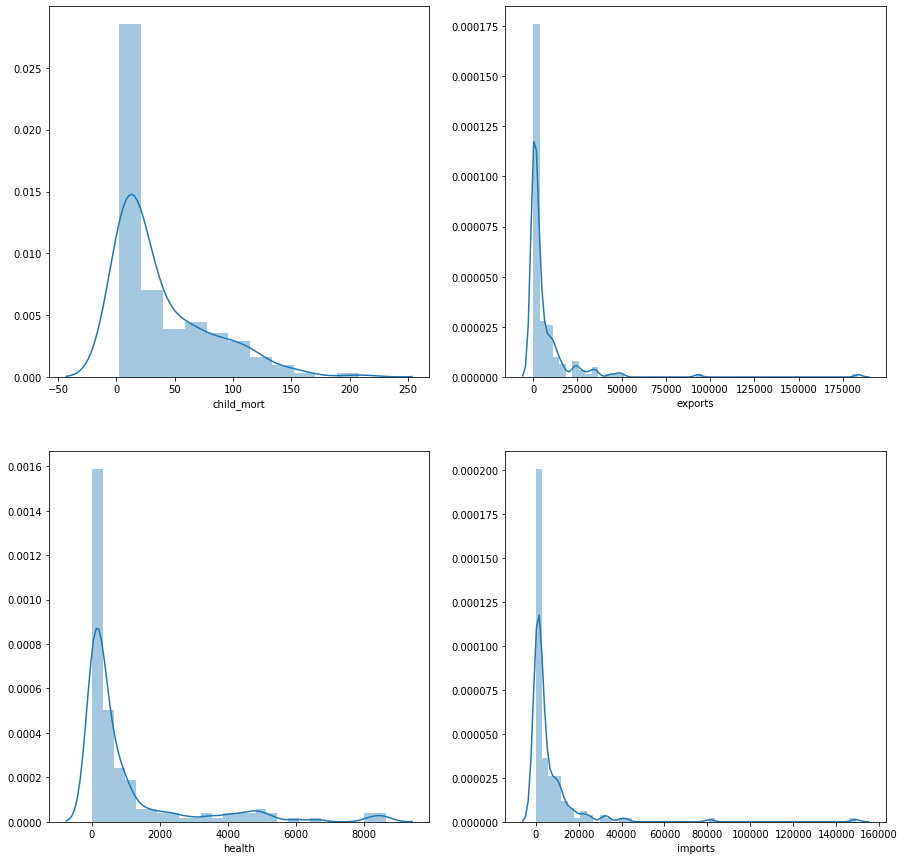

In [11]:
plt.figure(figsize = (15, 15))
feature = ['child_mort', 'exports', 'health', 'imports']
for i in enumerate(feature):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(country[i[1]])

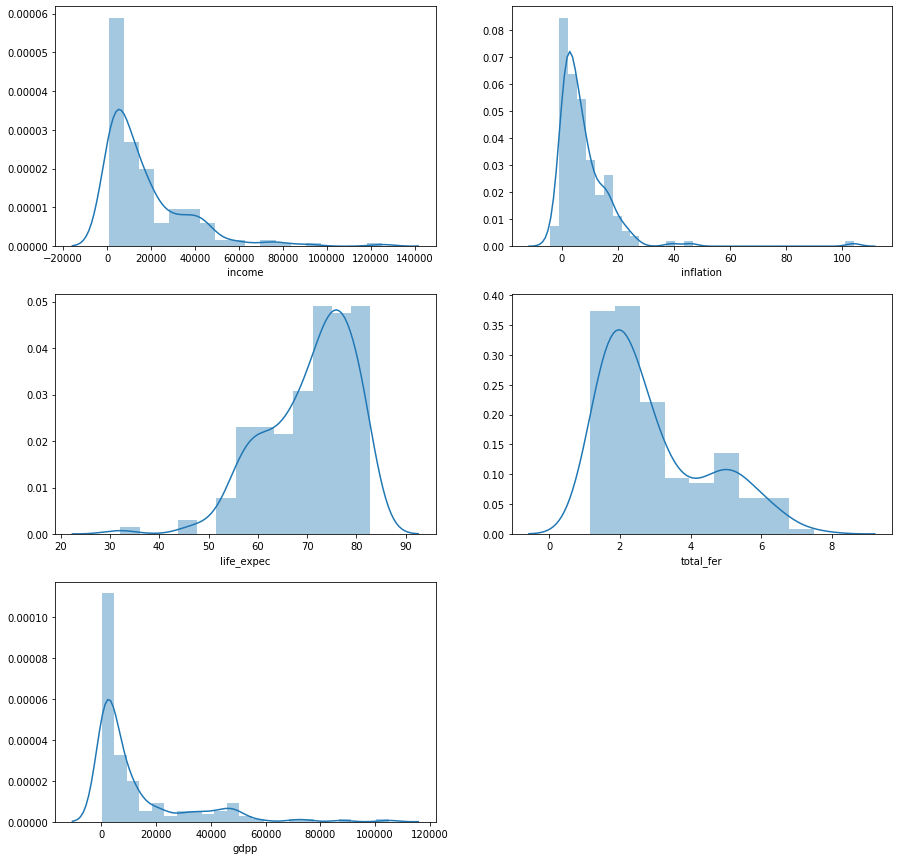

In [12]:
plt.figure(figsize = (15, 15))
feature = ['income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(3,2,i[0]+1)
    sns.distplot(country[i[1]])

## 5. Prepare the data for modelling

In [14]:
#creating a new dataset with only those features that we need for modelling
df = country[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']]
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Univariate Analysis of the modelling features 

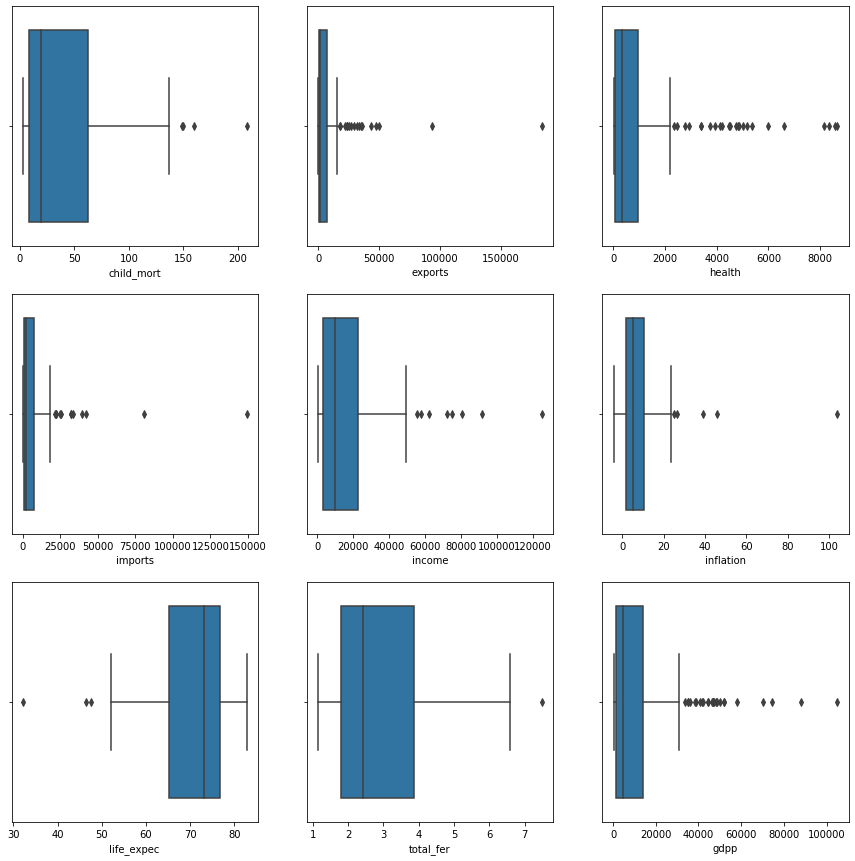

In [15]:
plt.figure(figsize = (15, 15))
feature = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(country[i[1]])

On checking the data we have come to the conclusion that below are
the features which need to be capped on the higher end
- child_mort, exports, health, imports, income, inflation, gdpp

### Capping of Variables

In [16]:
# Capping the modelling features 

q4a = df['child_mort'].quantile(0.95)
q4b = df['exports'].quantile(0.95)
q4c = df['health'].quantile(0.95)
q4d = df['imports'].quantile(0.95)
q4e = df['income'].quantile(0.95)
q4f = df['inflation'].quantile(0.95)
q4g = df['gdpp'].quantile(0.95)


df['child_mort'][df['child_mort']>=q4a]=q4a
df['exports'][df['exports']>=q4b]=q4b
df['health'][df['health']>=q4c]=q4c
df['imports'][df['imports']>=q4d]=q4d
df['income'][df['income']>=q4e]=q4e
df['inflation'][df['inflation']>=q4f]=q4f
df['gdpp'][df['gdpp']>=q4g]=q4g

C:\Users\purvija\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\purvija\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:9114: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\purvija\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_gui

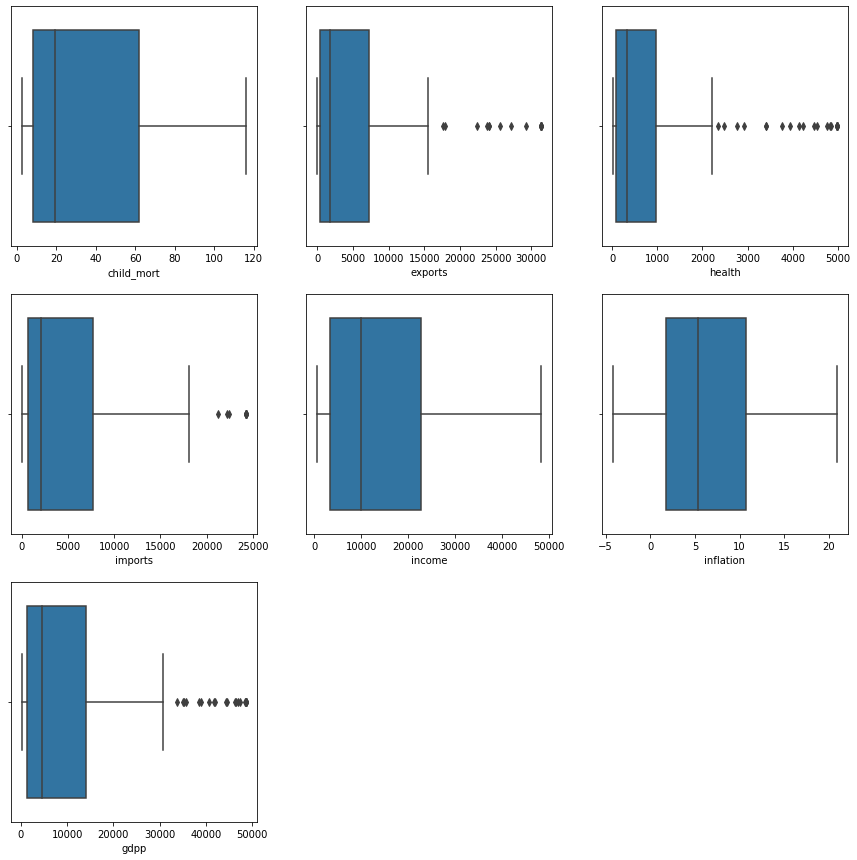

In [17]:
#checking outliers after capping the data
plt.figure(figsize = (15, 15))
feature = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'gdpp']
for i in enumerate(feature):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(df[i[1]])

On hard capping the features, we have reduced the outliers by a lot and now the features are ready to be scaled

### Scaling of Variables

In [83]:
# rescaling
rfm_df = df[['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'gdpp']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(167, 7)

In [84]:
#creating scaled values dataframe from scaled array
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'gdpp']
rfm_df_scaled.head()

,child_mort,exports,health,imports,income,inflation,gdpp
0,1.479341,-0.669581,-0.629435,-0.732729,-0.958349,0.394438,-0.757362
1,-0.559029,-0.542172,-0.473489,-0.472182,-0.394006,-0.383226,-0.523321
2,-0.262690,-0.475838,-0.530017,-0.560152,-0.192552,1.440750,-0.498838
3,2.193878,-0.418960,-0.588935,-0.543087,-0.667360,2.190136,-0.560376
4,-0.733509,-0.027134,-0.150685,0.306422,0.227992,-0.862393,0.013312


## Hopkins Score

In [95]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [96]:
hopkins(rfm_df_scaled)

0.8795676301037582

Since the Hopkins score is quite high, we can easily perform clustering on the dataset

## 5. Modelling

#### Hierarchical Clustering

In [21]:
# single linkage
mergings_single = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

NameError: name 'rfm_df_scaled' is not defined

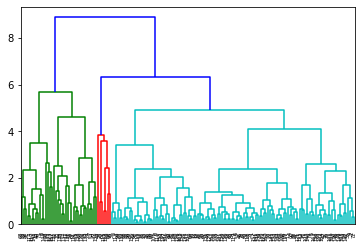

In [86]:
# complete linkage
mergings= linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

As the output of complete linkage gives a clearer dendogram hence we have proceeded further analysis with Complete Linkage

In [20]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

NameError: name 'mergings' is not defined

In [19]:
# assign cluster labels
country['cluster_labels_HI'] = cluster_labels
country.head()

NameError: name 'cluster_labels' is not defined

In [89]:
#Count of countries in each cluster
country.cluster_labels_HI.value_counts()

0    122
1     38
2      7
Name: cluster_labels_HI, dtype: int64

### Cluster Profiling on Hierarchical Dataset

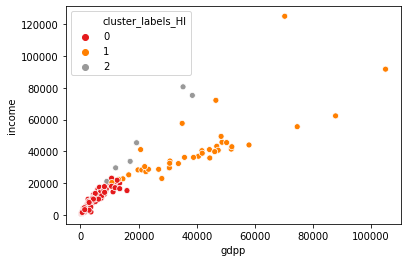

In [112]:
sns.scatterplot(x = "gdpp" , y = "income", hue = 'cluster_labels_HI', data = country, palette = "Set1")

- Cluser 0 has the least income and gdpp whereas cluster 1 has good high income and gdpp

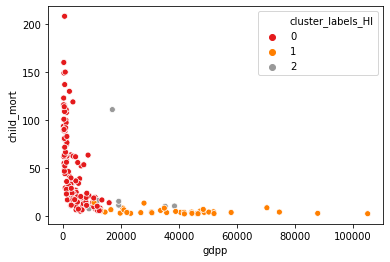

In [114]:
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'cluster_labels_HI', data = country, palette = "Set1")

- Cluster 0 has high child_mort and Cluster 1 has high gdpp and low child_mort

**By Above analysis Cluster_0 seems to have countries which need our attention**

In [18]:
country[country['cluster_labels_HI']==0].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True,False]).head(7)

KeyError: 'cluster_labels_HI'

### Univariate and Bivariate Analysis after Clustering via Hierarchical Methodology

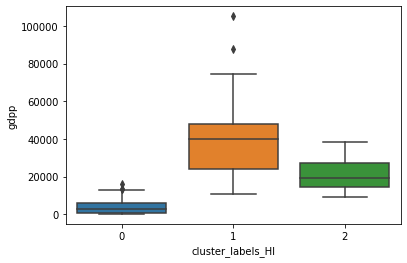

In [90]:
# Cluster v/s GDPP
sns.boxplot(x='cluster_labels_HI', y='gdpp', data=country)

-  The GDPP of 7 countries belonging to Cluster 2 have the highest gdpp amongst all countries of the dataset. 
- The GDPP of 122 countries belonging to Cluster 0 have the lowest gdpp amongst all countries of the dataset. 

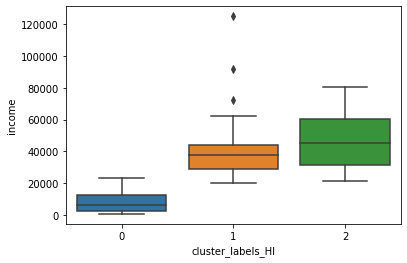

In [91]:
# Cluster v/s Income
sns.boxplot(x='cluster_labels_HI', y='income', data=country)

- The Income of 7 country belonging to Cluster 2 has the highest Income amongst all countries of the dataset.
- The Income of 122 countries belonging to Cluster 1 have the lowest Income amongst all countries of the dataset.

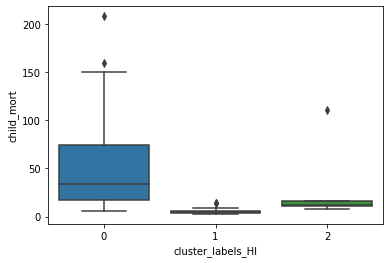

In [93]:
#Cluster v/s child_mort
sns.boxplot(x='cluster_labels_HI', y='child_mort', data=country)

- The Child mortality rate of 122 country belonging to Cluster 0 have the highest Child mortality rate amongst all countries of the dataset.
- The Child mortality rate of 45 countries belonging to Cluster 1 and 2 have the least Child mortality rate amongst all countries of the dataset.

### Based on the above analysis of Countries in Cluster 0, we can deduce that these 122 countries have lower Income, GDPP and high mortality rate which makes them ideal for the CEO's attention.

But since its a very huge number,we will cluster the model using Kmeans method for better insights

# K-Means Clustering

### Finding the Optimal Number of Clusters
### SSD

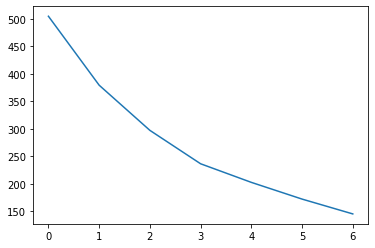

In [97]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

- Based on the above elbow curve, number of clusters should be 3, but to make sure we will perform sihouette analysis

### Silhouette Analysis

In [98]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5553504014514673
For n_clusters=3, the silhouette score is 0.36718909986220816
For n_clusters=4, the silhouette score is 0.35920711061583743
For n_clusters=5, the silhouette score is 0.37648534266607936
For n_clusters=6, the silhouette score is 0.3852975840216675
For n_clusters=7, the silhouette score is 0.3790804613802756
For n_clusters=8, the silhouette score is 0.3814978267430122


- as 2,3 clusters are very less, also 6/7 clusters are not required for analysis we will take n = 4

### Model Creation using K-Means

In [99]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [100]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 3, 0, 1, 3, 3, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 3, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 3, 3,
       0, 1, 1, 1, 1, 2, 2, 3, 1, 0, 3, 2, 2, 1, 0, 2, 3, 1, 1, 2, 2, 1,
       2, 3, 0, 2, 1, 1, 1, 0, 3, 3, 1, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       0, 3, 2, 2, 0, 3, 2, 1, 1, 1, 1, 1, 3, 0, 1, 1, 2, 1, 3, 2, 1, 3,
       2, 0, 3, 3, 1, 1, 3, 3, 1, 1, 2, 1, 0, 0, 2, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 3, 3, 1, 2, 1, 1, 1, 2, 2], dtype=int32)

In [101]:
# assign the label
country['cluster_id_Km'] = kmeans.labels_
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_HI,cluster_id_Km
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,1


In [102]:
#Count of countries in each cluster
country.cluster_id_Km.value_counts()

1    76
2    49
3    25
0    17
Name: cluster_id_Km, dtype: int64

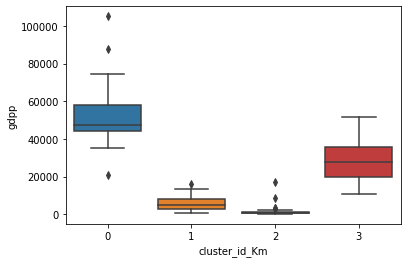

In [103]:
# Cluster v/s GDPP
sns.boxplot(x='cluster_id_Km', y='gdpp', data=country)

-  The GDPP of 17 countries belonging to Cluster 0 have the highest gdpp amongst all countries of the dataset. 
- The GDPP of 49 countries belonging to Cluster 2 have the lowest gdpp amongst all countries of the dataset. 

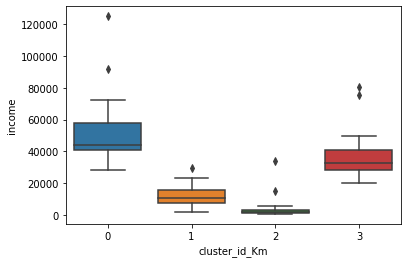

In [104]:
#Cluster v/s Income
sns.boxplot(x='cluster_id_Km', y='income', data=country)

- The Income of 17 country belonging to Cluster 0 has the highest Income amongst all countries of the dataset.
- The Income of 49 countries belonging to Cluster 2 have the lowest Income amongst all countries of the dataset.

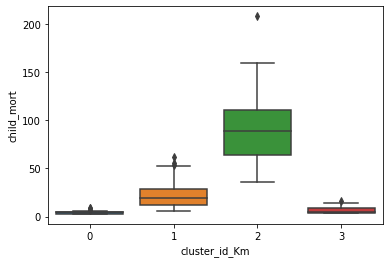

In [105]:
#Cluster v/s Child_mort
sns.boxplot(x='cluster_id_Km', y='child_mort', data=country)

- Cluster 2 has highest child mortality rate 

## Cluster Profiling

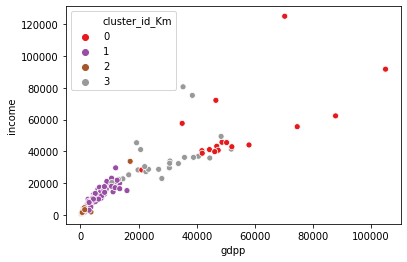

In [107]:
sns.scatterplot(x = "gdpp" , y = "income", hue = 'cluster_id_Km', data = country, palette = "Set1")

- cluster 2 has least income and gdpp 

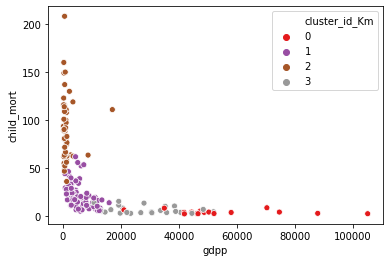

In [109]:
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'cluster_id_Km', data = country, palette = "Set1")

- The Child mortality rate of 49 country belonging to Cluster 2 have the highest Child mortality rate amongst all countries of the dataset.
- The Child mortality rate of 17 countries belonging to Cluster 0 have the least Child mortality rate amongst all countries of the dataset.

In [121]:
country[country['cluster_id_Km']==2].sort_values(by = ['gdpp', 'income','child_mort'], ascending = [True, True,False]).head(7)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_HI,cluster_id_Km
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0,2
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,0,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0,2
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0,2
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,0,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0,2


- Top 7 Countries which are in dire need of aid and CEO's attention are 
        - Burundi
        - Liberia
        - Congo, Dem. Rep.
        - Niger
        - Sierra Leone
        - Madagascar
        - Mozambique